<a href="https://colab.research.google.com/github/priyadharshinibd-collab/Projects-/blob/main/task_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Evaluate Clustering with Silhouette Score

### Subtask:
Evaluate the quality of the clustering for different numbers of clusters using the silhouette score.

**Reasoning**:
The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. We will calculate the silhouette score for a range of K values and visualize the results to help determine the optimal number of clusters.

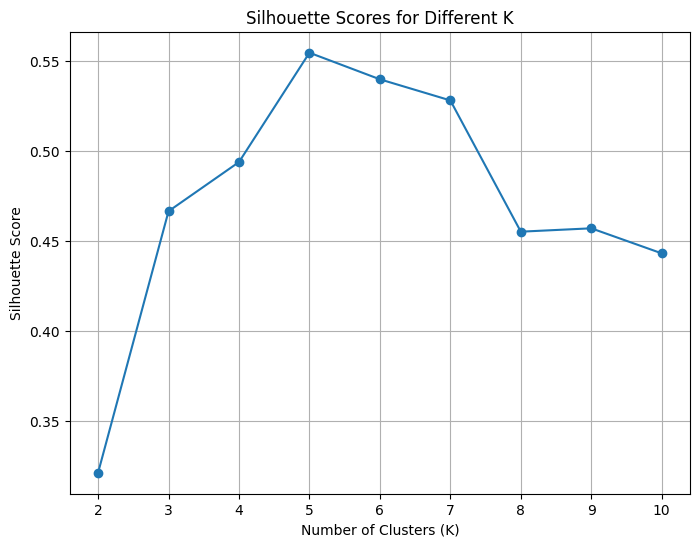

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate silhouette scores for a range of K values
silhouette_scores = []
k_range = range(2, 11)  # Silhouette score is not defined for K=1

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca[['PCA Component 1', 'PCA Component 2']])
    score = silhouette_score(df_pca[['PCA Component 1', 'PCA Component 2']], kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## Visualize Clusters

### Subtask:
Visualize the clusters with color coding in the PCA-reduced space.

**Reasoning**:
Create a scatter plot of the PCA-transformed data, color-coding the points based on their assigned cluster labels to visualize the customer segments.

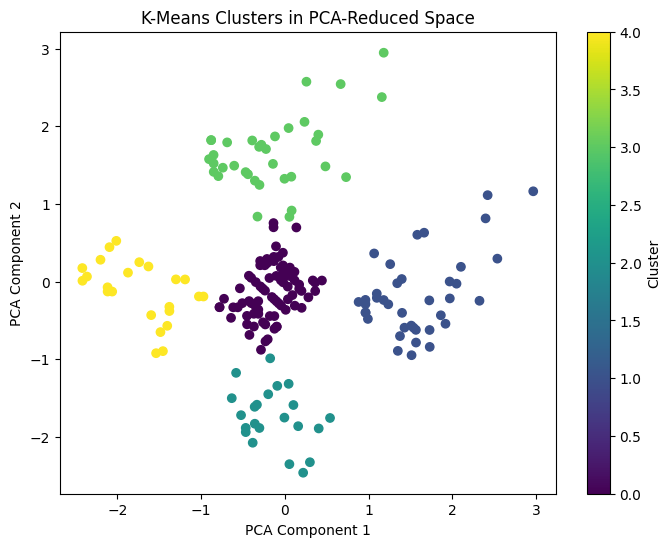

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA Component 1'], df_pca['PCA Component 2'], c=df_pca['Cluster'], cmap='viridis')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

## Determine Optimal K with Elbow Method

### Subtask:
Use the elbow method to find the optimal number of clusters (K) for K-Means clustering.

**Reasoning**:
The elbow method helps determine the optimal number of clusters by plotting the inertia (within-cluster sum of squares) for different values of K. The "elbow point" in the plot, where the rate of decrease in inertia sharply changes, is often considered the optimal K. We will calculate inertia for a range of K values and then visualize the results.

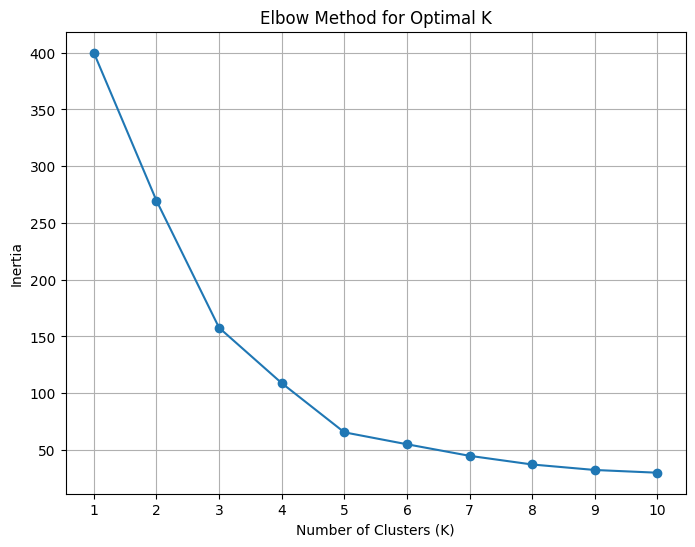

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for a range of K values
inertia = []
k_range = range(1, 11)  # Test K from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_pca[['PCA Component 1', 'PCA Component 2']])  # Use PCA components for elbow method
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

## K-Means Clustering

### Subtask:
Apply K-Means clustering to the PCA-transformed data to identify customer segments.

**Reasoning**:
Apply K-Means clustering to the PCA-transformed data (`df_pca`) to group customers into segments. We will choose an arbitrary number of clusters (e.g., 5) for now, but in a real analysis, you would use methods like the elbow method or silhouette score to determine the optimal number of clusters. After clustering, the cluster labels will be added to the `df_pca` DataFrame.

In [7]:
from sklearn.cluster import KMeans

# Apply K-Means clustering (assuming 5 clusters for now)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

# Display the first few rows with cluster labels
display(df_pca.head())

,PCA Component 1,PCA Component 2,Cluster
0,-1.537109,-0.922207,4
1,-0.384168,-2.075149,2
2,-2.416002,0.010665,4
3,-0.466982,-1.938355,2
4,-1.455678,-0.895678,4


In [3]:
import pandas as pd

df = pd.read_csv('/content/Mall_Customers.csv')
display(df.head(10))

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [1]:
import zipfile
import os

zip_path = '/content/archive (7).zip'
extract_path = '/content/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List files in the extracted directory
extracted_files = os.listdir(extract_path)
print("Extracted files:", extracted_files)

Extracted files: ['.config', 'Mall_Customers.csv', 'archive (7).zip', 'sample_data']


# Task
Load the dataset from "/content/archive (7).zip", display the first 10 rows, and then visualize the dataset, optionally using PCA for a 2D view.

## Initial visualization

### Subtask:
Create visualizations to understand the distributions and relationships of key features like 'Annual Income (k$)' and 'Spending Score (1-100)'.


**Reasoning**:
Create a scatter plot and histograms to visualize the relationships and distributions of 'Annual Income (k$)' and 'Spending Score (1-100)'.



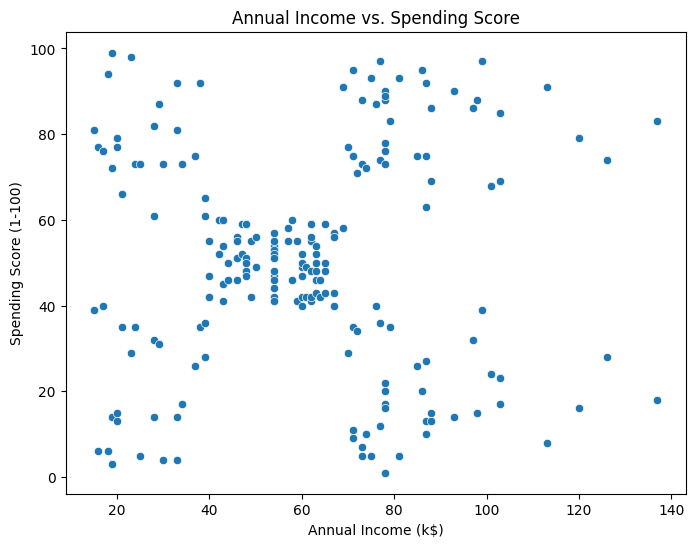

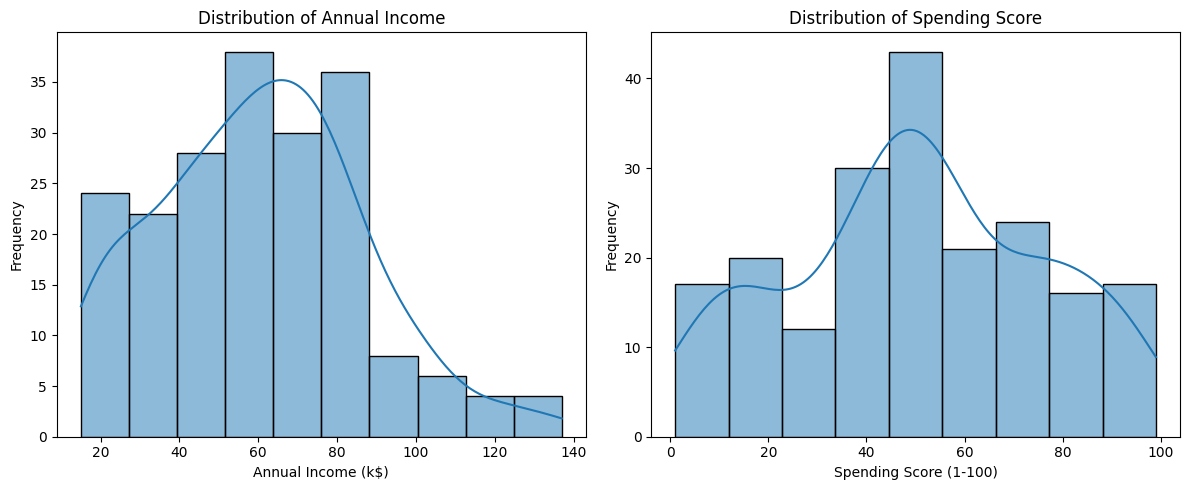

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Annual Income vs. Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Optional pca

### Subtask:
Perform Principal Component Analysis (PCA) to reduce the dimensionality of the data to 2 components, which can be helpful for visualization.


**Reasoning**:
Perform PCA on the selected columns to reduce dimensionality.



In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = ['Annual Income (k$)', 'Spending Score (1-100)']
X = df[features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame with PCA results
df_pca = pd.DataFrame(data=X_pca, columns=['PCA Component 1', 'PCA Component 2'])
display(df_pca.head())

,PCA Component 1,PCA Component 2
0,-1.537109,-0.922207
1,-0.384168,-2.075149
2,-2.416002,0.010665
3,-0.466982,-1.938355
4,-1.455678,-0.895678


## Visualize after pca

### Subtask:
If PCA is performed, visualize the data in the reduced 2D space.


**Reasoning**:
Create a scatter plot of the PCA-transformed data to visualize the data in the reduced 2D space.



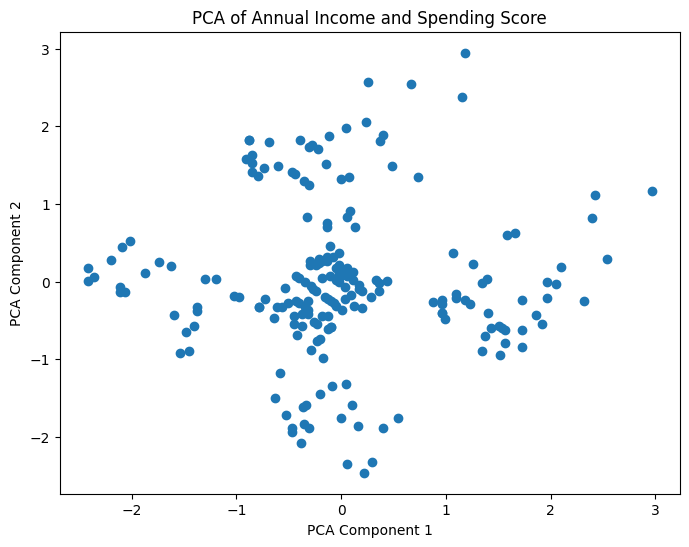

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA Component 1'], df_pca['PCA Component 2'])
plt.title('PCA of Annual Income and Spending Score')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The scatter plot of 'Annual Income (k\$)' versus 'Spending Score (1-100)' shows a potential grouping of customers.
*   The distributions of both 'Annual Income (k\$)' and 'Spending Score (1-100)' appear to be somewhat uniform, without strong peaks or skewness.
*   PCA successfully reduced the dimensions of 'Annual Income (k\$)' and 'Spending Score (1-100)' to two principal components.
*   The visualization of the PCA-transformed data in 2D space also suggests potential clusters, similar to the original scatter plot.

### Insights or Next Steps

*   The visualizations hint at the existence of distinct customer segments based on income and spending habits, which could be further investigated using clustering algorithms.
*   Applying clustering algorithms like K-Means to the PCA-transformed data could help formally identify and characterize these potential customer segments.
